<table style="width:100%; border:none; font-family: Arial, sans-serif;">
  <tr>
    <td style="width:120px;">
      <img src="./images/logo.png" alt="Logo ENSAJ" width="100" style="display:block; margin:auto;" />
    </td>
    <td style="vertical-align: middle; text-align: left; padding-left: 15px;">
      <h1 style="margin-bottom:4px; font-weight: bold; color: #2E4053;">Intention d’Achat des Acheteurs en Ligne</h1>
      <h2 style="margin-top:0; margin-bottom:6px; font-weight: normal; color: #34495E;">Entraînement des Modèles SVM et Arbre de Décision</h2>
      <p style="margin:0; font-weight: 600; color: #5D6D7E;">Ossama ETTAQAFI</p>
      <p style="margin:0; font-style: italic; color: #7F8C8D;">ENSAJ, Master SDIA - Année universitaire 2024-2025</p>
      <p style="margin-top:10px; font-size: 0.9em; color: #7F8C8D;">
        Source des données : <a href="https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset/data" target="_blank">Kaggle - Online Shoppers Purchasing Intention</a>
      </p>
    </td>
  </tr>
</table>

---

## Objectif du Notebook

Ce notebook présente la construction, l’entraînement et l’évaluation de deux modèles de machine learning : **Support Vector Machine (SVM)** et **Arbre de décision**, pour prédire l’intention d’achat des visiteurs en ligne.

---

## Contexte du Projet

Les données ont été prétraitées et nettoyées dans les étapes précédentes. Nous utilisons ici deux algorithmes supervisés simples mais efficaces pour comprendre la performance prédictive sur ce dataset.

---

## Objectifs du Notebook

- Charger les données prétraitées (`cleaned_data`)  
- Séparer les données en ensembles d’entraînement et test  
- Entraîner un modèle SVM et un Arbre de décision  
- Évaluer les modèles avec accuracy, F1-score et matrice de confusion  
- Comparer les performances

---

## Environnement

- Python 3.x  
- Bibliothèques : pandas, numpy, scikit-learn, matplotlib, seaborn, etc.

**Alors, on commence notre :**

<h1 style="text-align: center;">L'entraînement et l’évaluation des models</h1>

## 1. SVM

Évaluation du modèle SVM
Accuracy  : 0.6421
F1-score  : 0.3910

Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.62      0.75      3127
           1       0.27      0.74      0.39       572

    accuracy                           0.64      3699
   macro avg       0.60      0.68      0.57      3699
weighted avg       0.83      0.64      0.69      3699



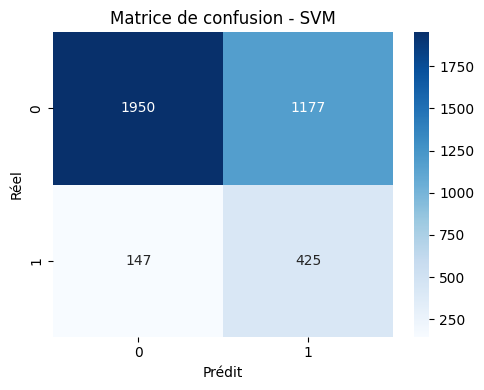

In [12]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les datasets
train_set = pd.read_csv("train_set.csv")
test_set = pd.read_csv("test_set.csv")

# 2. Séparer les features (X) et la cible (y)
X_train = train_set.drop("Revenue", axis=1)
y_train = train_set["Revenue"]

X_test = test_set.drop("Revenue", axis=1)
y_test = test_set["Revenue"]

# 3. Initialiser et entraîner le modèle SVM avec gestion du déséquilibre
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, class_weight='balanced')
svm_model.fit(X_train, y_train)

# 4. Prédictions
y_pred = svm_model.predict(X_test)

# 5. Évaluation
print("Évaluation du modèle SVM")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-score  : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print("\nClassification Report :")
print(classification_report(y_test, y_pred, zero_division=0))

# 6. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion - SVM")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

Le modèle SVM prédit correctement environ 64% des cas. Il est très bon pour reconnaître les visiteurs qui n’achètent pas (précision élevée), mais il a du mal à identifier précisément ceux qui achètent (précision faible).

Il détecte quand même 74% des acheteurs, mais beaucoup de ces prédictions sont fausses (beaucoup de faux positifs).

En résumé, le modèle repère assez bien les non-acheteurs, mais il se trompe souvent quand il dit qu’un visiteur va acheter. C’est un bon début, mais il faut encore l’améliorer pour mieux prédire les achats.

## 2. Arbre de Décision

Évaluation du modèle Arbre de Décision
Accuracy  : 0.7499
F1-score  : 0.2653

Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      3127
           1       0.24      0.29      0.27       572

    accuracy                           0.75      3699
   macro avg       0.55      0.56      0.56      3699
weighted avg       0.77      0.75      0.76      3699



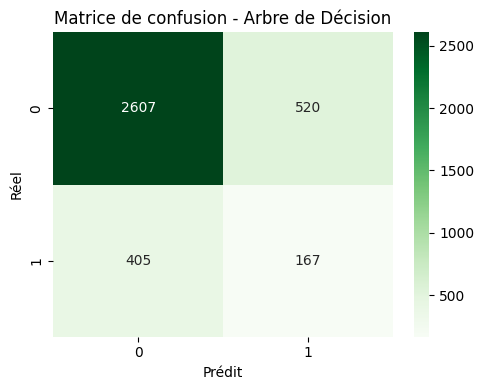

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les datasets
train_set = pd.read_csv("train_set.csv")
test_set = pd.read_csv("test_set.csv")

# 2. Séparer les features (X) et la cible (y)
X_train = train_set.drop("Revenue", axis=1)
y_train = train_set["Revenue"]

X_test = test_set.drop("Revenue", axis=1)
y_test = test_set["Revenue"]

# 3. Initialiser et entraîner le modèle Arbre de Décision avec gestion du déséquilibre
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)

# 4. Prédictions
y_pred = dt_model.predict(X_test)

# 5. Évaluation
print("Évaluation du modèle Arbre de Décision")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-score  : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print("\nClassification Report :")
print(classification_report(y_test, y_pred, zero_division=0))

# 6. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Matrice de confusion - Arbre de Décision")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()